In [39]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import sys, os
root = os.path.join(os.getcwd(), '../')
sys.path.append(root)

from matplotlib import pyplot as plt
import matplotlib 
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


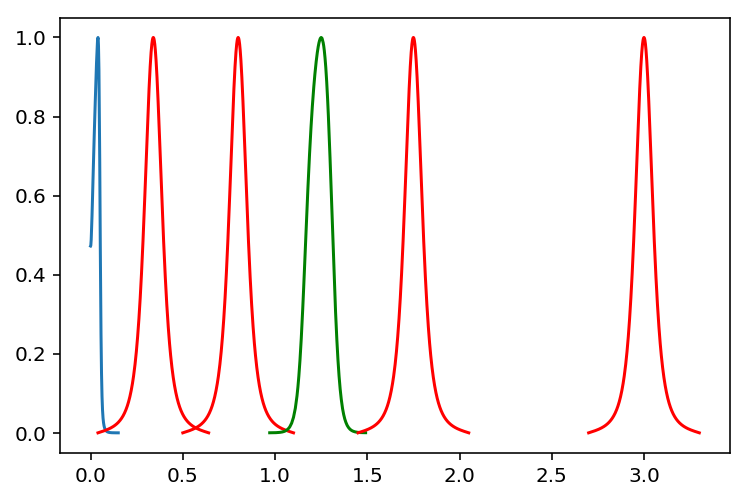

In [67]:
gun = np.loadtxt('../templates/eic.25.GeV.precool.injector/fields/data/dcgun_GHV.1d.txt',skiprows=1)
cav0 = np.loadtxt('../templates/eic.25.GeV.precool.injector/fields/data/197MHz.qw.cavity.txt',skiprows=1)
cav3 = np.loadtxt('../templates/eic.25.GeV.precool.injector/fields/data/591MHz.qw.cavity.txt',skiprows=1)
sol = np.loadtxt('../templates/eic.25.GeV.precool.injector/fields/data/solenoid_SLA_L60.1d.txt',skiprows=1)

plt.plot(gun[:,0]+0.15, np.abs(gun[:,1])/max(np.abs(gun[:,1])));
plt.plot(sol[:,0]+0.34, sol[:,1]/max(np.abs(sol[:,1])), 'r');
plt.plot(sol[:,0]+0.80, sol[:,1]/max(np.abs(sol[:,1])), 'r');
plt.plot(cav0[:,0]+1.25, cav0[:,1]/max(np.abs(cav0[:,1])), 'g');
plt.plot(sol[:,0]+1.75, sol[:,1]/max(np.abs(sol[:,1])), 'r');
plt.plot(sol[:,0]+3.00, sol[:,1]/max(np.abs(sol[:,1])), 'r');

<disgten.Generator with input: 
n_particle: 10000
output:
  file: gpt.particles.gdf
  type: gpt
r_dist:
  alpha:
    units: dimensionless
    value: 0.0
  sigma_xy:
    units: mm
    value: 1
  type: rsg
random_type: hammersley
start:
  MTE:
    units: meV
    value: 150
  type: cathode
t_dist:
  alpha:
    units: dimensionless
    value: 0.0
  sigma_t:
    units: ns
    value: 0.5
  type: sg
total_charge:
  units: nC
  value: 2.5

>
Distribution format: gpt
Output file: gpt.particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 2.5 nC.
   Number of macroparticles: 10000.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 1.41421 mm, power = INF
   theta distribution:       min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Super Gaussian
      simga_t = 0.5 ns, power = INF
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, s

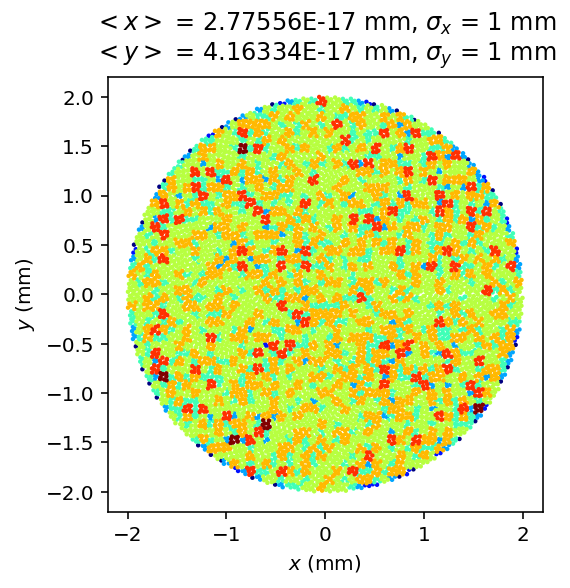

In [5]:
from distgen.generator import Generator
from distgen.plot import plot_dist2d, plot_current_profile

DISTGEN_INPUT_FILE = os.path.join(root,'templates/eic.25.GeV.precool.injector/distgen.in.yaml')
gen = Generator(DISTGEN_INPUT_FILE,verbose=True)
print(gen)
beam = gen.beam()

plot_dist2d(beam, 'x', 'mm', 'y', 'mm', nbins=50, axis='equal', title_on=True);

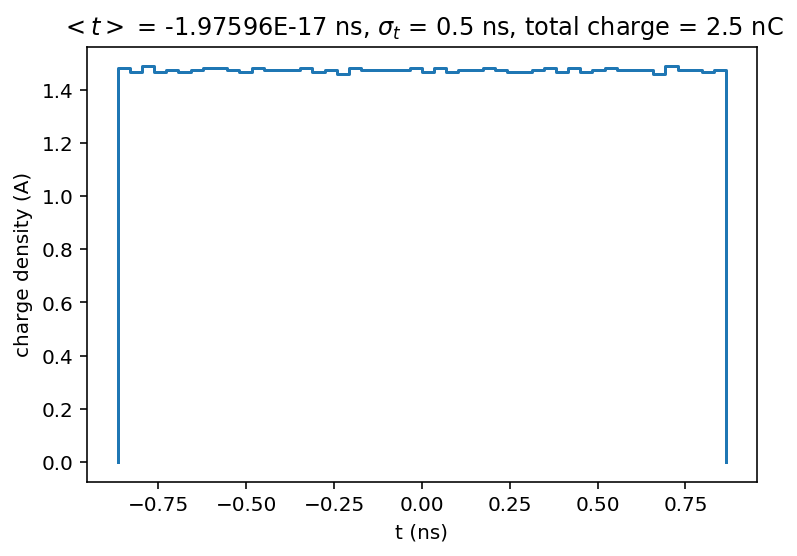

In [9]:
plot_current_profile(beam, 'ns', 'A', nbins=50, title_on=True);

In [70]:
from gpt.gpt_distgen import run_gpt_with_distgen

GPT_INPUT_FILE = os.path.join(root,'templates/eic.25.GeV.precool.injector/gpt.in')
DISTGEN_INPUT_FILE = os.path.join(root,'templates/eic.25.GeV.precool.injector/distgen.in.yaml')

settings={'n_particle':200, 
          'Ntout':500,
          'space_charge':1,
          'gun_voltage':400,
          'buncher_voltage':50,
          'buncher_relative_phase':-90, 
          'sol_1_current':3.25,
          'sol_2_current':2.5,
          'sol_3_current':2.5,
          'sol_4_current':2.5,
          'cavity_1_voltage':1000}

G = run_gpt_with_distgen(settings,
                         gpt_input_file=GPT_INPUT_FILE,
                         distgen_input_file=DISTGEN_INPUT_FILE,
                         verbose=True,
                         auto_phase=False)
print(G)

Run GPT with Distgen:
Replacing param n_particle with value 200
Ntout is in gpt
space_charge is in gpt
gun_voltage is in gpt
buncher_voltage is in gpt
buncher_relative_phase is in gpt
sol_1_current is in gpt
sol_2_current is in gpt
sol_3_current is in gpt
sol_4_current is in gpt
cavity_1_voltage is in gpt
Linking particle files, distgen output will point to -> "gpt.particles.gdf" in working directory.
Replacing Distgen output params

Distgen >------

Distribution format: gpt
Output file: /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmpjme5fp31/gpt.particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 2.5 nC.
   Number of macroparticles: 200.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 1.41421 mm, power = INF
   theta distribution:       min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Super Gaussian
      simga_t = 0.5 ns, power = INF
   px distribution: Gaussian
      avg_px = 0 eV/c, s

In [71]:
plt.plot(G.stat('mean_z'), G.stat('mean_kinetic_energy')/1e3);

KeyError: 'particles'

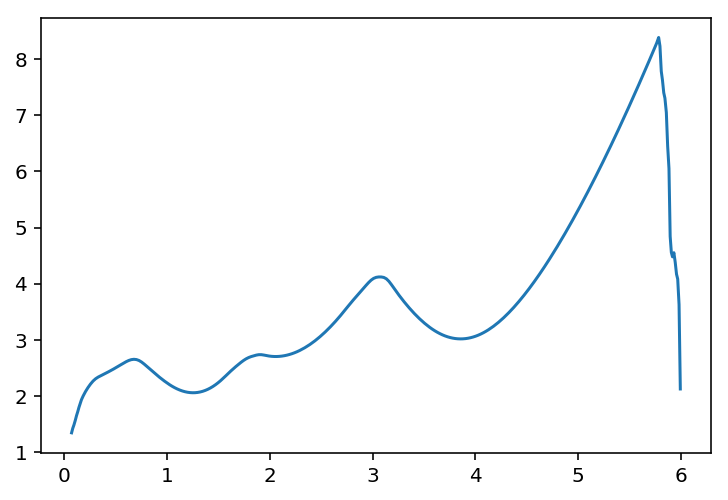

In [69]:
plt.plot(G.stat('mean_z'), G.stat('sigma_x')*1e3);